# Vehicle Analysis

### Step-1: Data Loading and Prepration.

In [43]:
# Importing Necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
# setting the max_rows and max_collumns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
# reading the file and assigning it to the variable data_auto

data_auto = pd.read_csv('Data Science - Intern - Data Set.csv')

In [46]:
# Displaying first five observations of the data set

data_auto.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,pluscode,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,NaN,1774.9688,NaN,0.00000,NaN,749.000,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,21,NaN,NaN,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,NaN,NaN,0,1,102,Released,Released,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,NaN,1774.9688,NaN,0.00000,NaN,1208.375,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,18,NaN,NaN,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,NaN,NaN,19,2,102,Released,Pressed,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,NaN,1774.9688,NaN,1.40625,NaN,752.625,60780800,NaN,NaN,1

In [47]:
# Shape of the data for knowing rows and collumns

print(f'Data set has {data_auto.shape[0]} rows and {data_auto.shape[1]} columns')

Data set has 18434 rows and 141 columns


In [48]:
# types of data types in data set

print(f'data set types breakdown\n')
print(data_auto.dtypes.value_counts())
data_auto.dtypes

data set types breakdown

float64    122
int64       13
object       6
Name: count, dtype: int64


uniqueid                                     object
ts                                            int64
lat                                         float64
lng                                         float64
external_bat_voltage                        float64
internal_bat_voltage                        float64
engineload                                    int64
tanklevel                                   float64
throttle                                    float64
coolant                                       int64
intakeairtemp                               float64
engineoiltemp                               float64
imap                                        float64
vehiclespeed                                float64
warmups                                     float64
rpm                                         float64
obddistance                                   int64
maf                                         float64
fuelrail                                    float64
runtime     

### Step2: Data cleaning and preprocessing:

In [49]:
# Dropping all the columns which does not hold any vale or all the rows in columns are null

data_auto.dropna(axis=1, how='all', inplace=True)

In [50]:
data_auto.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,pluscode,vibration_status,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,1970.85,21,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,7JFW3994+,0,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,0,1,102,Released,Released,Pressed,NaN
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,1970.85,18,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,7JFW3994+,0,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,19,2,102,Released,Pressed,Pressed,NaN
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,1970.85,18,130,129,17936.0,22.8,83.22,4.70,0.337891,0.0,7JFW3994+,0,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,102,215,0,1,102,Pressed,Pressed,Released,NaN
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,1970.90,27,130,129,17936.0,20.4,74.46,8.60,0.121094,33.6,7JFW3994+,0,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,102,215,28,2,102,Released,Pressed,Released,NaN
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,1970.90,1,130,3,17936.0,23.2,84.68,0.00,125.500000,3.2,7JFW3994+,0,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,102,215,1,2,102,Released,Pressed,Released,NaN


In [51]:
#dropping all the unecessary categorical columns or features

data_auto.drop(['can_raw_data','uniqueid','pluscode'],axis=1,inplace=True)

In [52]:
data_auto.head()

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,1970.85,21,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,100.0,102,215,0,1,102,Released,Released,Pressed,NaN
1,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,1970.85,18,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,0,99.6,102,215,19,2,102,Released,Pressed,Pressed,NaN
2,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,1970.85,18,130,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,99.6,102,215,0,1,102,Pressed,Pressed,Released,NaN
3,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,1970.90,27,130,129,17936.0,20.4,74.46,8.60,0.121094,33.6,0,99.6,102,215,28,2,102,Released,Pressed,Released,NaN
4,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,1970.90,1,130,3,17936.0,23.2,84.68,0.00,125.500000,3.2,0,100.0,102,215,1,2,102,Released,Pressed,Released,NaN


In [53]:
# shape of the data set after removing categorical data

data_auto.shape

(18434, 30)

In [54]:
# names of the features which has missing values

features_with_missing_values = [feature for feature in data_auto.columns if data_auto[feature].isnull().sum() > 0]
features_with_missing_values

['runtime', 'fuel_level', 'adblue_level']

In [55]:
# number of missing values per features

data_auto.isnull().sum()

ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
vibration_status                           0
engine_throttle_valve1_pos                 0
engine_throttle_valve2_pos                 0
enginefuel

In [56]:
# Check for duplicates
duplicates = data_auto.duplicated().sum()
if not duplicates:
    print('No Duplicates Found')
else:
    print('Duplicates Found')
    data_auto = data_auto.drop_duplicates()

No Duplicates Found


In [57]:
# replacing missing values in features with median value

data_auto['adblue_level']=data_auto['adblue_level'].replace(np.nan,data_auto['adblue_level'].median())

data_auto['runtime']=data_auto['runtime'].replace(np.nan,data_auto['runtime'].median())

data_auto['fuel_level']=data_auto['fuel_level'].replace(np.nan,data_auto['fuel_level'].median())

In [58]:
#Handling Outliers

Q1 = data_auto['fuel_economy'].quantile(0.25)
Q3 = data_auto['fuel_economy'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_auto[(data_auto['fuel_economy'] < (Q1 - 1.5 * IQR)) | (data_auto['fuel_economy'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fuel_economy':", outliers.shape[0])

# Removing outliers from the Feature fuel_economy

data_auto = data_auto[~((data_auto['fuel_economy'] < (Q1 - 1.5 * IQR)) | (data_auto['fuel_economy'] > (Q3 + 1.5 * IQR)))]

Number of outliers in 'fuel_economy': 2837


### We have removed outliers from the fuel economy feature as we are considering the impact on fuel economy.

In [59]:
# further removing more features from the data set as they have same repeated values

data_auto.drop(['engineoiltemp','selected_gear','vibration_status','engine_throttle_valve2_pos','enginefueltemp','accelerator_pedal_pos_2'], axis=1, inplace=True)

# new reduced size of data 
data_auto.shape

(15597, 24)

In [60]:
# Description of features

data_auto.describe(include='all')

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
count,1.559700e+04,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,1.559700e+04,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597.000000,15597,15597,15597,15597.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,Pressed,Released,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14281,13627,15098,NaN
mean,1.711565e+09,18.725945,78.873017,44.954094,85.288517,35.095772,988.206234,6.631388e+07,2127.079301,33.025261,14.392191,19480.029012,54.767173,199.900182,11.013070,6.967972,41.150529,99.603565,33.082324,4.575880,NaN,NaN,NaN,85.471437
std,1.270249e+06,0.838521,3.306050,27.369426,6.378884,16.504444,228.366413,3.225308e+06,91.489344,20.898084,21.036580,909.836438,26.878205,98.105448,7.807806,9.282522,34.505867,4.271033,28.533328,4.890369,NaN,NaN,NaN,14.162363
min,1.709341e+09,0.000000,0.000000,0.000000,30.000000,0.000000,49.000000,6.078080e+07,1970.850000,0.000000,0.000000,17935.500000,0.400000,1.460000,0.050000,0.000000,0.000000,21.200000,0.000000,1.000000,NaN,NaN,NaN,44.400000
25%,1.710251e+09,18.738352,78.797852,20.000000,84.000000,25.765625,762.250000,6.351812e+07,2047.000000,14.000000,0.000000,18695.000000,32.400000,118.260000,3.600000,1.777344,0.000000,100.000000,0.000000,1.000000,NaN,NaN,NaN,78.800000
50%,1.711640e+09,18.854588,79.095024,43.000000,85.000000,39.328125,964.625000,6.630032e+07,2126.600000,32.000000,15.000000,19469.000000,56.400000,205.860000,9.850000,2.808594,47.600000,100.000000,36.000000,2.000000,NaN,NaN,NaN,88.400000
75%,1.712538e+09,18.924072,79.353683,68.000000,89.000000,47.328125,1163.750000,6.910014e+07,2205.700000,52.000000,17.000000,20264.000000,77.600000,283.240000,18.350000,7.556641,72.000000,100.000000,60.000000,9.000000,NaN,NaN,NaN,99.200000


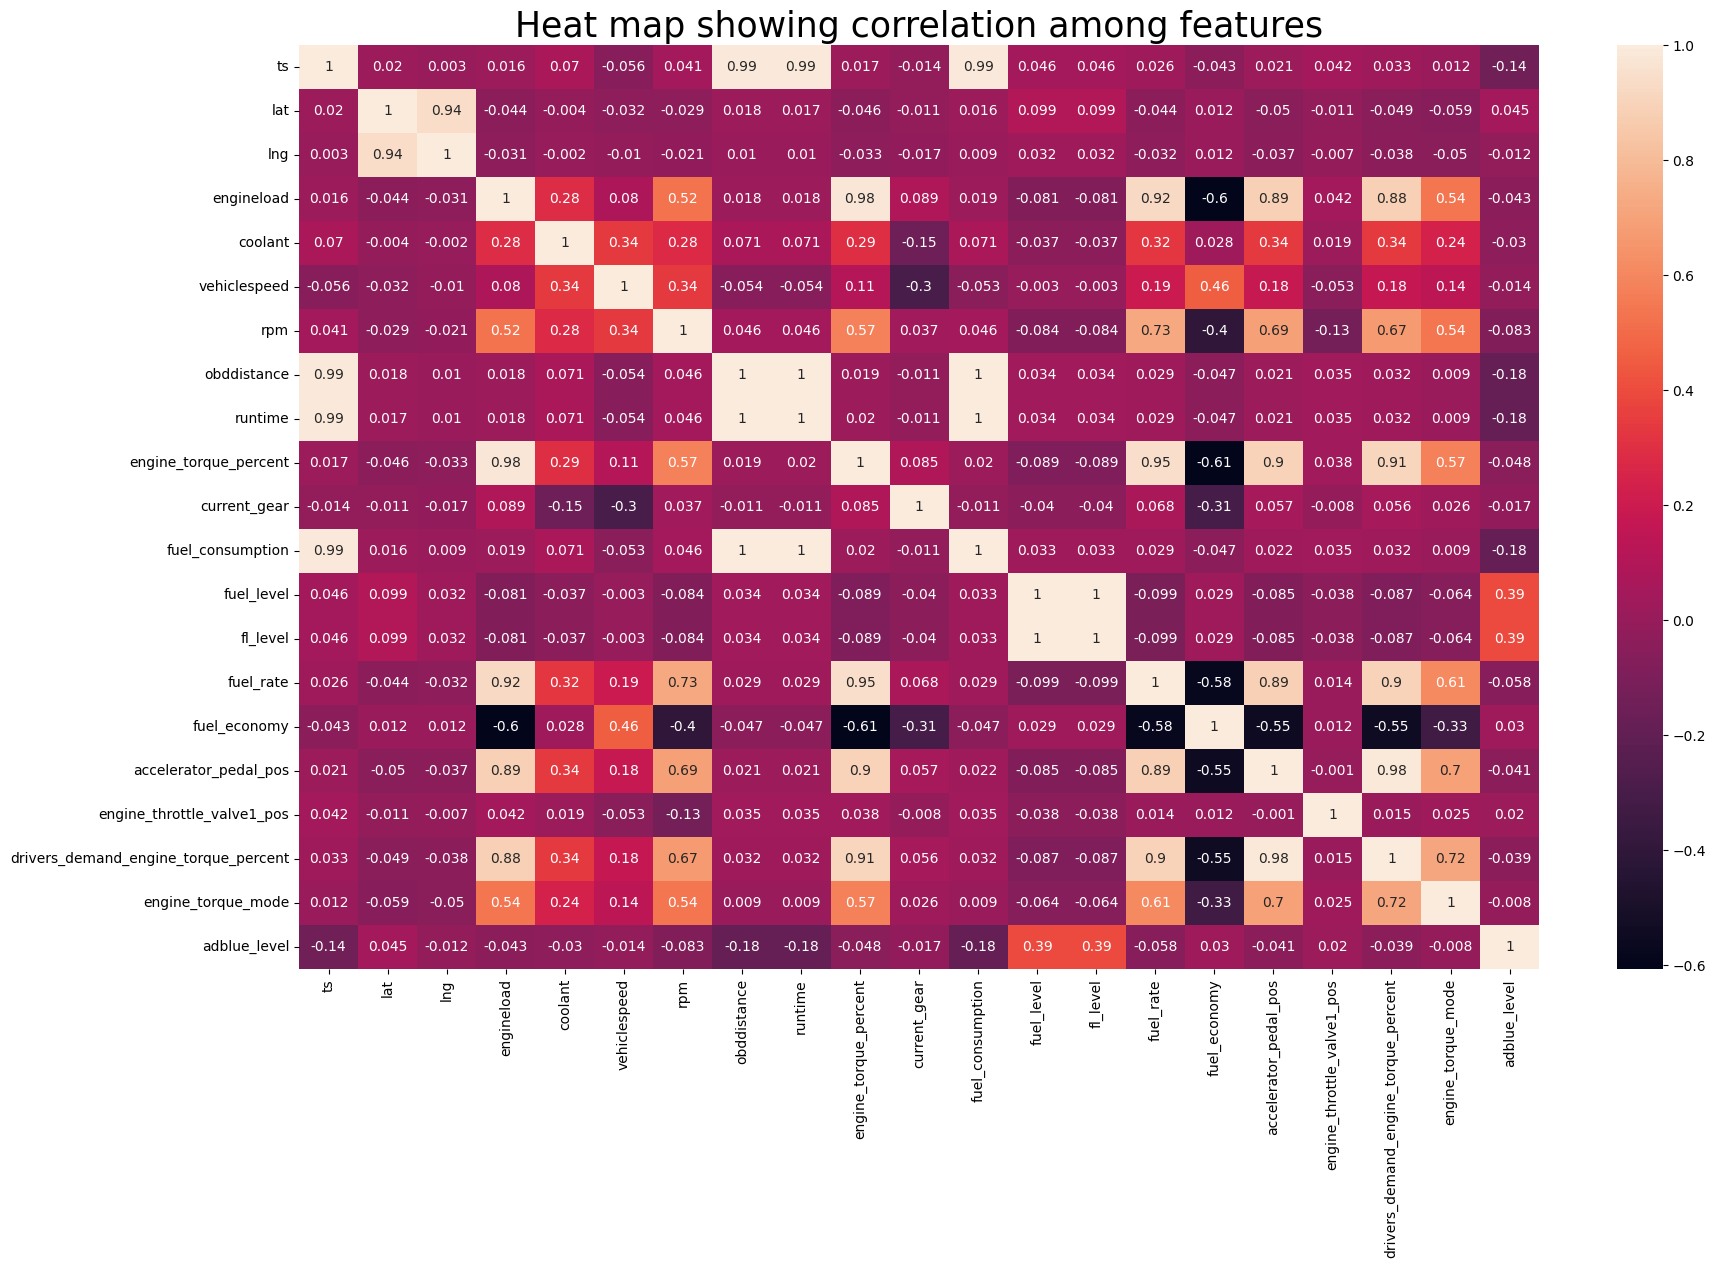

In [61]:
#selecting only the numerical data and saving into the variable data_auto_cleaned

data_auto_cleaned = data_auto.select_dtypes(include=['int64', 'float64'])

#Create correlation matrix

data_auto_correlation_matrix = round(data_auto_cleaned.corr(),3)

#Creating Heat MAp
plt.figure(figsize=(20,12))
sns.heatmap(data=data_auto_correlation_matrix, annot=True, annot_kws={"size": 10})
plt.title('Heat map showing correlation among features', fontsize=25)
plt.show()

## Step3: Exploratory data analysis:

## Univariate Analysis

### Categorical Features

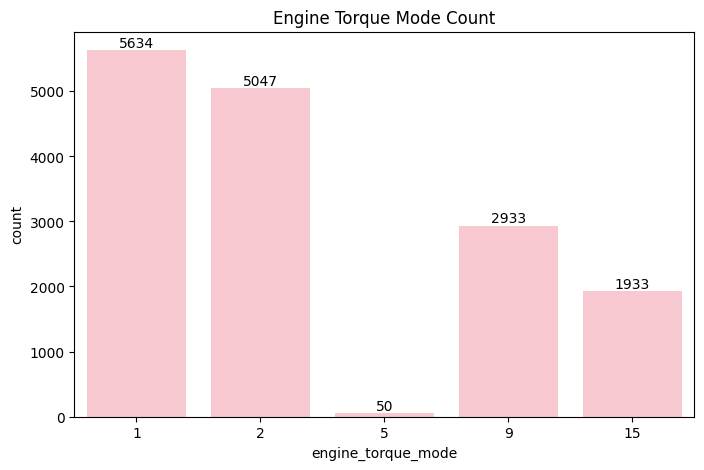

In [62]:
# Categorcial features count plot

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=data_auto_cleaned, x='engine_torque_mode', color='pink')
plt.title('Engine Torque Mode Count')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Observation : Most frequently torque mode used is 1  and least torque mode used is 5

# 

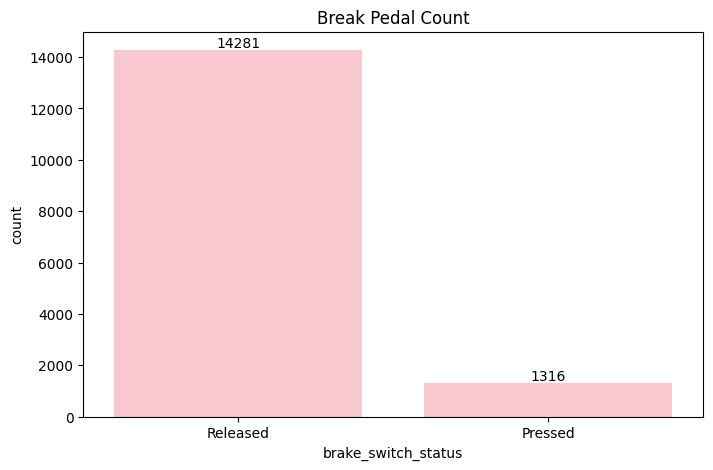

In [63]:
# Categorcial feature count plot

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=data_auto, x='brake_switch_status', color='pink')
plt.title('Break Pedal Count')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Observation: Break Pedal is less used as it is pressed only 1316 times.

# 

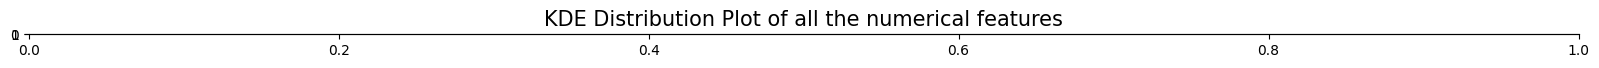

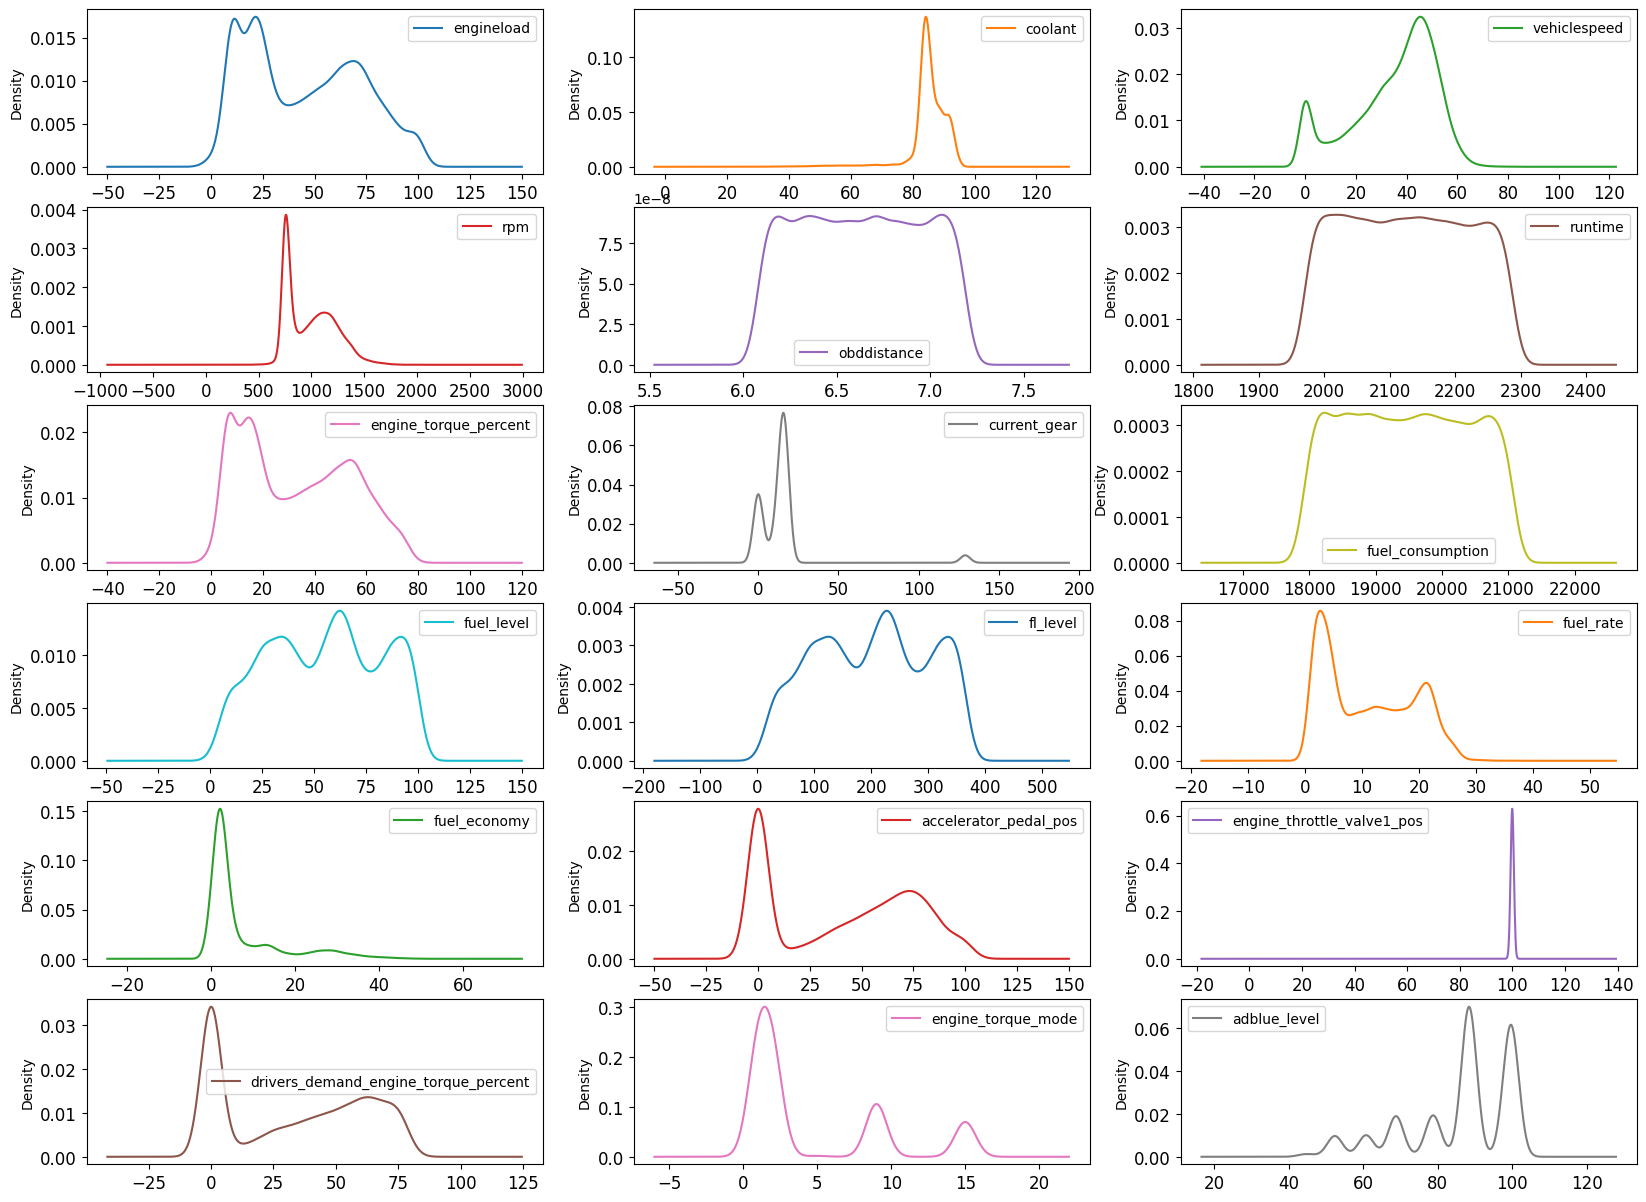

In [64]:
# Kde plot of all the numerical Features

plt.figure(figsize=(20,0))
plt.title('KDE Distribution Plot of all the numerical features', fontsize=15)
plot = data_auto_cleaned.iloc[:,3:].plot(kind= 'density', subplots=True, layout=(6,3), sharex=False, 

                     sharey=False,fontsize=12, figsize=(20,15))
plt.show()

## Observation: All the plot is skewed either left or right which shows they are not continuously distributed.

# 

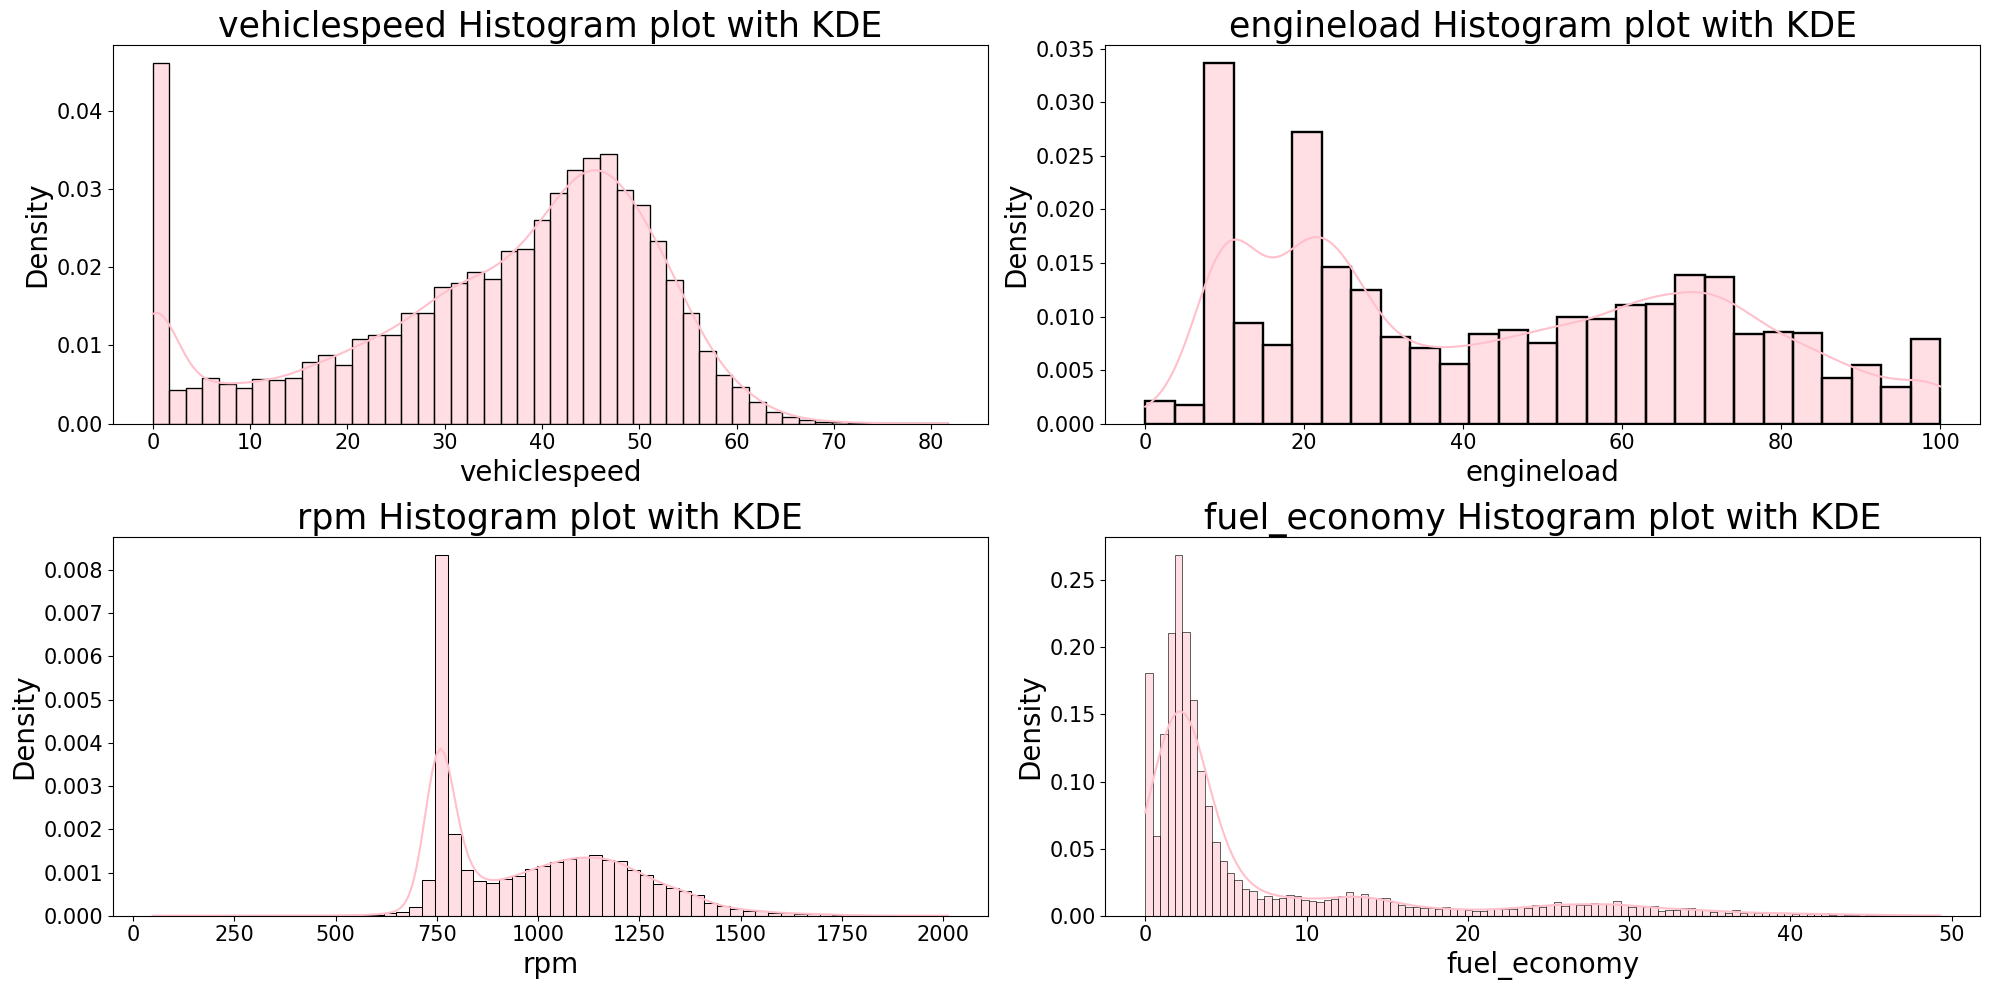

In [65]:
# Histogram plot of the numerical Features
plt.figure(figsize=(20,10))
columns = ['vehiclespeed','engineload','rpm','fuel_economy']

for count,i in enumerate(columns):
    plt.subplot(2,2,count+1)
    sns.histplot(data=data_auto_cleaned, x=i, kde=True, stat='density', color='pink', lw=20)
    plt.title(f'{i} Histogram plot with KDE', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)

plt.tight_layout()
plt.show()


## Observation: Extreme values can be observed which results in skewness of the data. 

# 

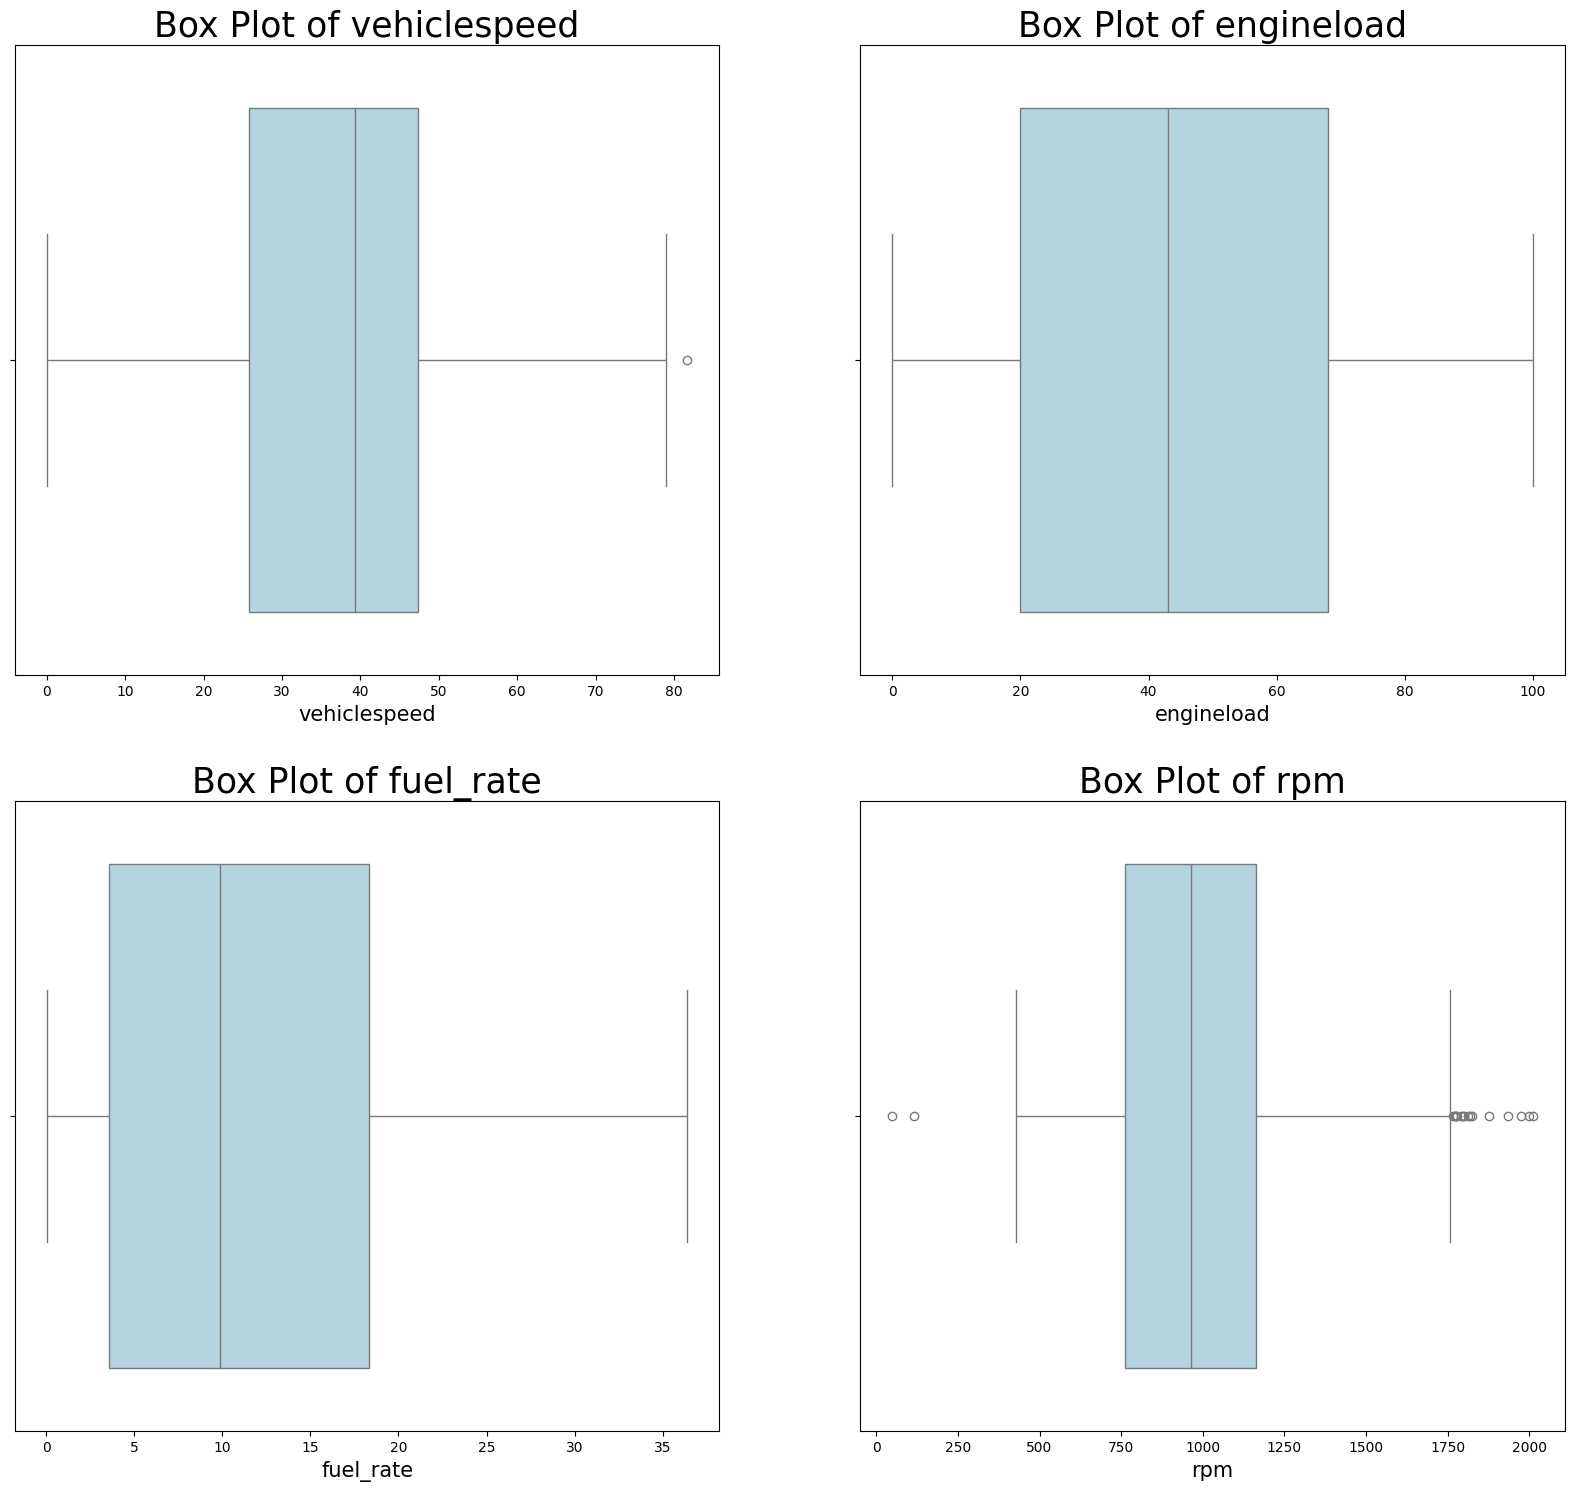

In [66]:
# Box plot of the numerical Features

plt.figure(figsize=(20,18))
columns = ['vehiclespeed','engineload','fuel_rate','rpm']

for count,i in enumerate(columns):
    plt.subplot(2,2,count+1)
    sns.boxplot(data=data_auto_cleaned, x=i, color='lightblue')
    plt.title(f'Box Plot of {i}', fontsize=25)
    plt.xticks(fontsize=10)
    plt.xlabel(i,fontsize=15)
    

plt.show()

## Observation: Outliers can be seened in rpm and vehiclespeed, while engineload and fuel rate shows no outliers.

# 

# Bivariate Analysis

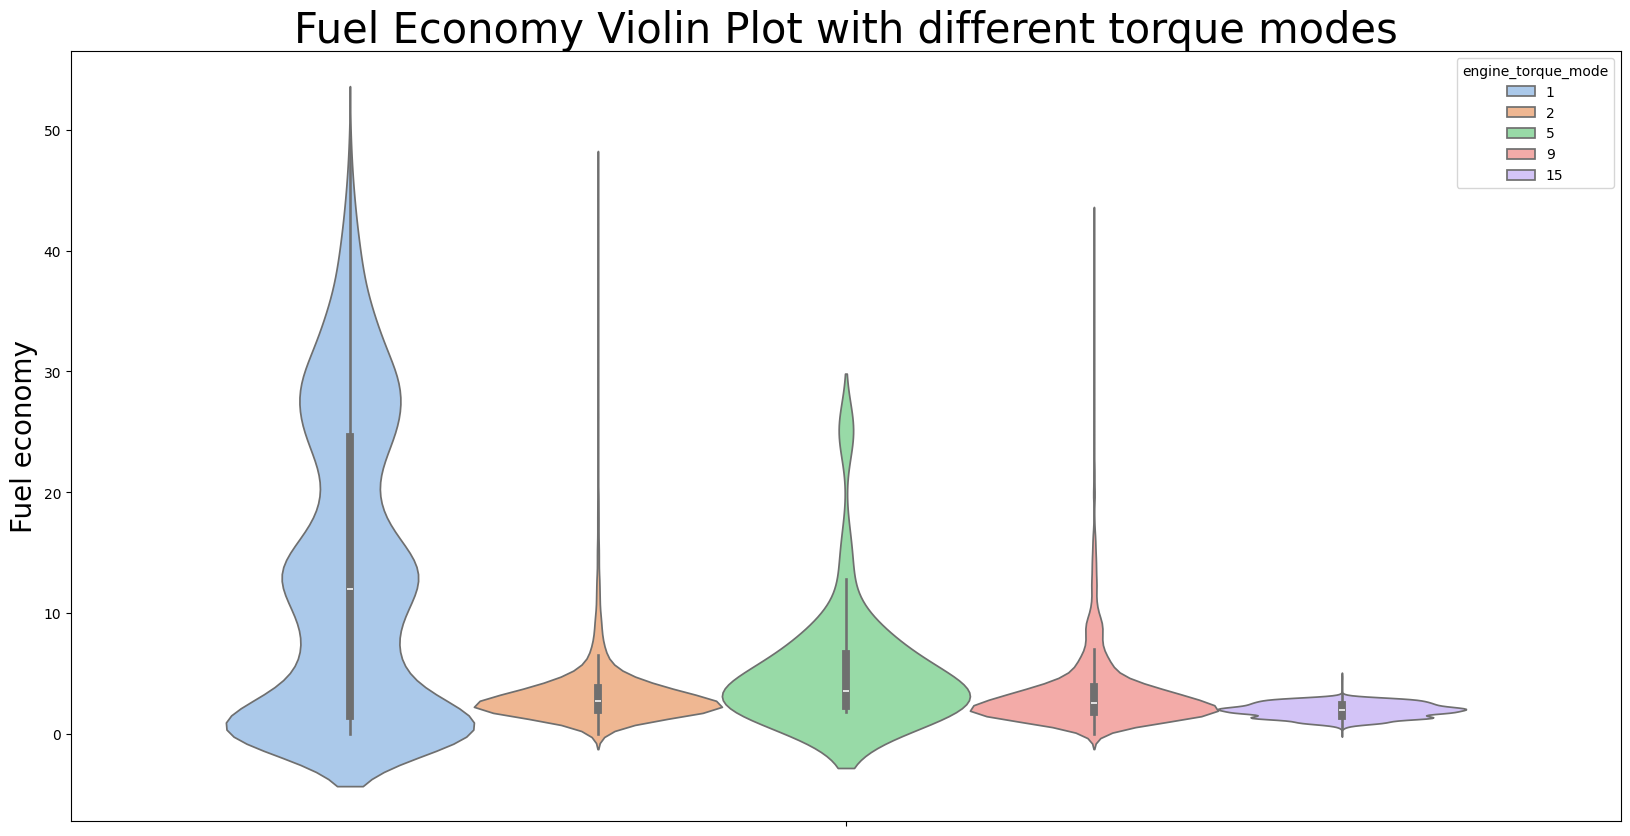

In [67]:
# violin plot 

plt.figure(figsize=(20,10))
sns.violinplot(data=data_auto_cleaned, y='fuel_economy', hue='engine_torque_mode', palette='pastel')
plt.title('Fuel Economy Violin Plot with different torque modes', fontsize=30)
plt.ylabel('Fuel economy', fontsize=20)
plt.show()

## Observation: highest fuel economy is seen from the torque mode 1 and least from the torque mode 15.

# 

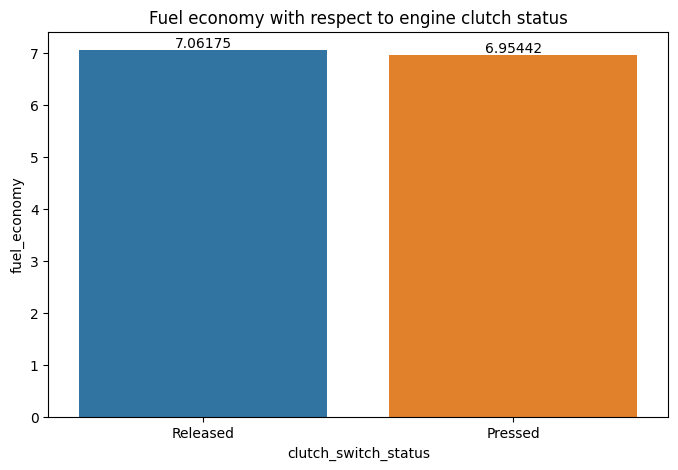

In [74]:
# Fuel economy with clutch status

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=data_auto, x='clutch_switch_status', y='fuel_economy',hue='clutch_switch_status', errorbar=None)
plt.title('Fuel economy with respect to engine clutch status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Observation: It can be inferred from the above plot that there is no significant impact on the fuel levels due to clutch switch status

# 

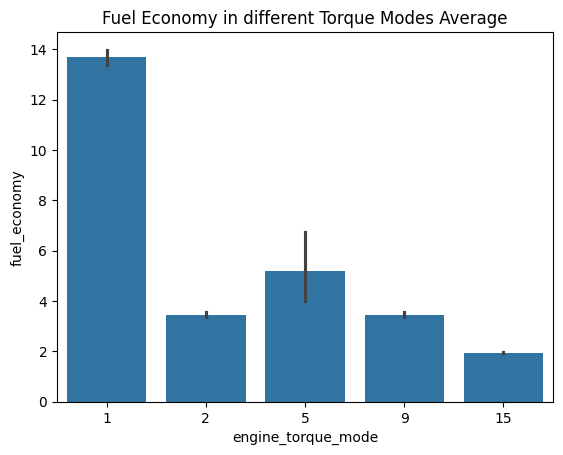

In [69]:
# Bar plot at differnt torque with fuel economy

sns.barplot(data=data_auto_cleaned, x='engine_torque_mode', y='fuel_economy')
plt.title('Fuel Economy in different Torque Modes Average')
plt.show()

## Observation: highest fuel economies is at 1 torque mode and the highest variance can be scened in the 5 torque mode.

# 

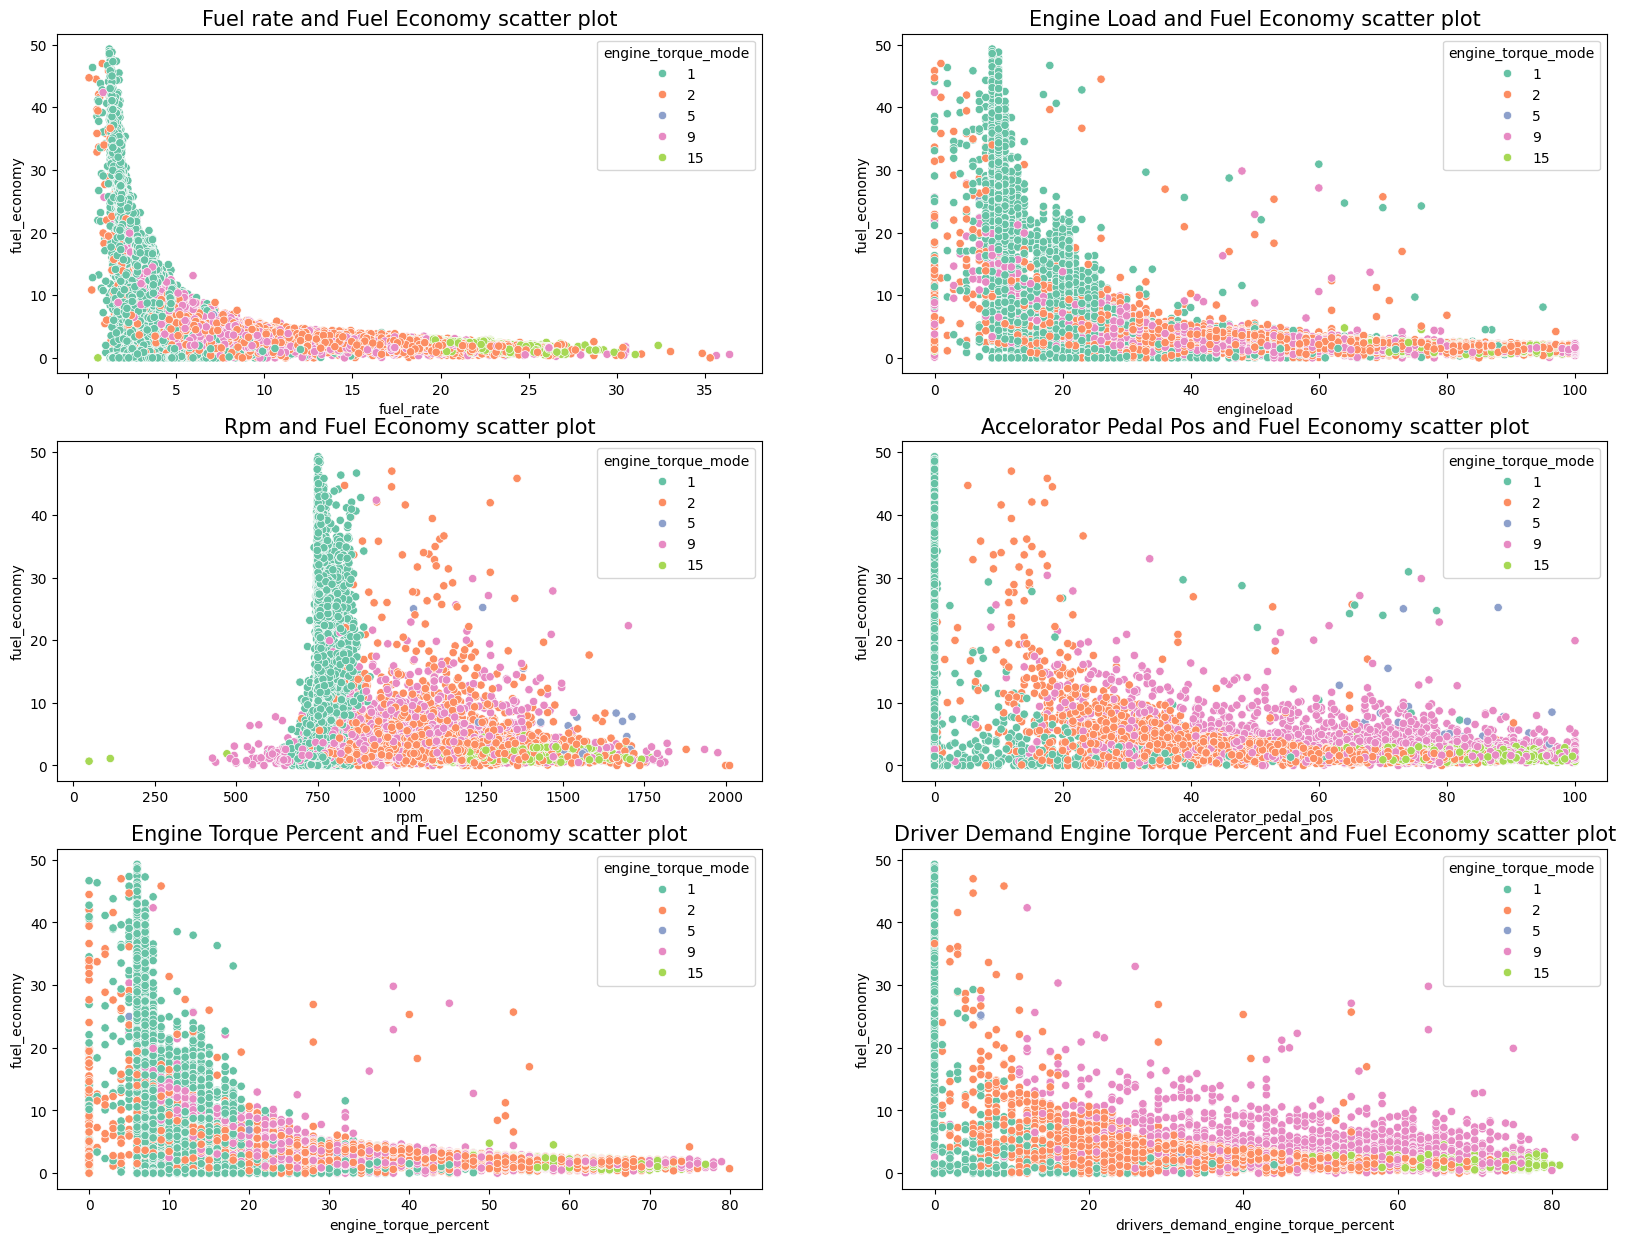

In [70]:
# scatter plot of fuel economy with different features

plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='fuel_rate', hue='engine_torque_mode', palette='Set2')
plt.title('Fuel rate and Fuel Economy scatter plot', fontsize=15)

plt.subplot(3,2,2)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='engineload', hue='engine_torque_mode', palette='Set2')
plt.title('Engine Load and Fuel Economy scatter plot', fontsize=15)

plt.subplot(3,2,3)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='rpm', hue='engine_torque_mode', palette='Set2')
plt.title('Rpm and Fuel Economy scatter plot', fontsize=15)

plt.subplot(3,2,4)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='accelerator_pedal_pos', hue='engine_torque_mode', palette='Set2')
plt.title('Accelorator Pedal Pos and Fuel Economy scatter plot', fontsize=15)

plt.subplot(3,2,5)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='engine_torque_percent', hue='engine_torque_mode', palette='Set2')
plt.title('Engine Torque Percent and Fuel Economy scatter plot', fontsize=15)

plt.subplot(3,2,6)
sns.scatterplot(data=data_auto_cleaned,y='fuel_economy',x='drivers_demand_engine_torque_percent', hue='engine_torque_mode', palette='Set2')
plt.title('Driver Demand Engine Torque Percent and Fuel Economy scatter plot', fontsize=15)

plt.show()

## Observation: 
## 1. Fuel rate and fuel economy shows an inverse relation
## 2. Engine load and fuel economy has an inverse relation at 0-20 level of engine load fuel economy is highest.
## 3. At Rpm Levels of 750-1000 the fuel economy is highest.
## 4. higher the pedal postion lower the fuel economy.
## 5. At lower level of Engine torque percent the fuel economy is hisghest.
## 6. higher the driver demand torque percent lower is the fuel economy.

# 

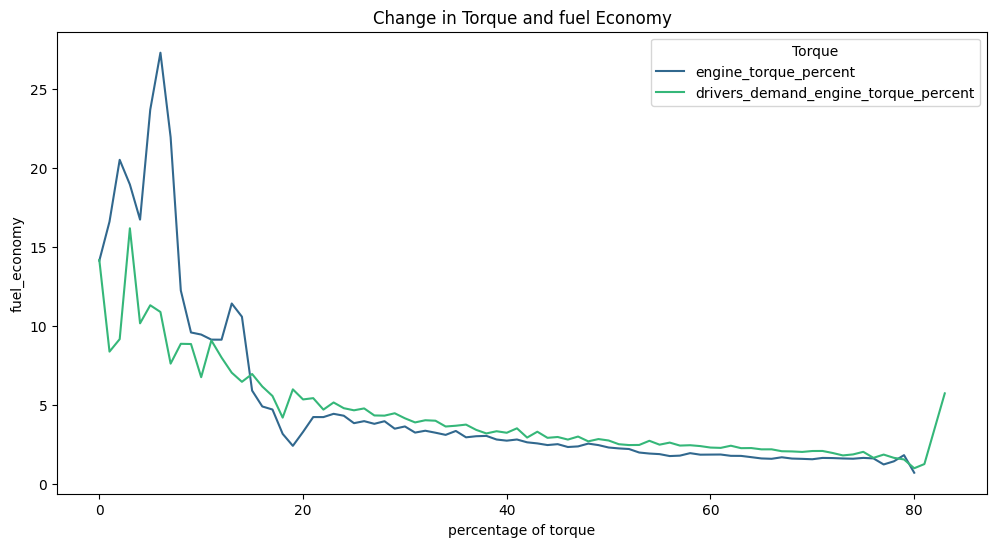

In [71]:
plt.figure(figsize=(12,6))

line_data = data_auto_cleaned[['fuel_economy','engine_torque_percent','drivers_demand_engine_torque_percent']].melt(id_vars='fuel_economy',value_vars=['engine_torque_percent','drivers_demand_engine_torque_percent'],var_name='Torque', value_name='percentage of torque')
sns.lineplot(data=line_data, x='percentage of torque', y='fuel_economy', hue='Torque', palette='viridis', errorbar=None)
plt.title('Change in Torque and fuel Economy')
plt.show()

## observation: At the earlier stage the difference between engine torque and drivers demand torque is high so at that level the fuel economy is high and as the gap gets thiner the fuel economy keeps on decreasing

# 

In [72]:
#Feature Engineering

# new feature added in the data set as change in torque percent

data_auto_cleaned['change_in_torque_percent'] = (data_auto_cleaned['drivers_demand_engine_torque_percent']-data_auto_cleaned['engine_torque_percent'])/(data_auto_cleaned['drivers_demand_engine_torque_percent']+1)
data_auto_cleaned.head()


,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,adblue_level,change_in_torque_percent
0,1709340731,19.069340,78.355148,28,33,0.00000,749.000,60780800,1970.85,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,100.0,0,1,88.4,-21.000000
1,1709340794,19.069347,78.355141,22,41,0.00000,1208.375,60780800,1970.85,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,99.6,19,2,88.4,0.050000
2,1709340857,19.069414,78.355179,25,48,1.40625,752.625,60780800,1970.85,18,129,17936.0,22.8,83.22,4.70,0.337891,0.0,99.6,0,1,88.4,-18.000000
3,1709340920,19.069258,78.355225,35,52,2.81250,996.375,60780820,1970.90,27,129,17936.0,20.4,74.46,8.60,0.121094,33.6,99.6,28,2,88.4,0.034483
5,1709341725,19.069117,78.356079,22,58,0.09375,750.750,60780920,1970.95,20,129,17936.0,22.0,80.30,5.00,0.386719,0.0,99.6,0,1,88.4,-20.000000


## Observation: We can see there is a clear relationship between engine torque and driver demanded torque to do feature engineering we have taken the percentage change with respect to eingine torque percent. It can be seen whenever the % change between themm is low there is a decline in fuel economy and as gap increase there is a increase in fuel economy.

# 

In [73]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = data_auto_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_auto_cleaned[numerical_cols] = scaler.fit_transform(data_auto_cleaned[numerical_cols])

# Display the standardized dataset
data_auto_cleaned.head()


,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,adblue_level,change_in_torque_percent
0,-1.751341,0.409538,-0.156648,-0.619474,-8.197389,-2.126512,-1.047500,-1.715576,-1.707678,-0.575443,-0.684173,-1.697644,-1.159608,-1.159608,-0.731736,-0.750679,-1.192604,0.092822,-1.159465,-0.731232,0.206792,-2.482271
1,-1.751291,0.409547,-0.156650,-0.838703,-6.943211,-2.126512,0.964134,-1.715576,-1.707678,-0.719001,-0.684173,-1.697644,-1.159608,-1.159608,-0.584443,-0.750679,-0.508641,-0.000835,-0.493555,-0.526742,0.206792,0.602559
2,-1.751242,0.409627,-0.156639,-0.729088,-5.845805,-2.041305,-1.031626,-1.715576,-1.707678,-0.719001,5.448199,-1.697095,-1.189373,-1.189373,-0.808585,-0.714277,-1.192604,-0.000835,-1.159465,-0.731232,0.206792,-2.042628
3,-1.751192,0.409440,-0.156625,-0.363706,-5.218716,-1.956098,0.035772,-1.715570,-1.707131,-0.288326,5.448199,-1.697095,-1.278667,-1.278667,-0.309069,-0.737633,-0.218826,-0.000835,-0.178125,-0.526742,0.206792,0.600285
5,-1.750558,0.409272,-0.156366,-0.838703,-4.278083,-2.120831,-1.039837,-1.715539,-1.706585,-0.623295,5.448199,-1.697095,-1.219137,-1.219137,-0.770160,-0.709017,-1.192604,-0.000835,-1.159465,-0.731232,0.206792,-2.335723


## We have done standardization in our data set as the data was not distributed continuosly this make our data normally distributed.

# 